/home/kamil/anaconda3/envs/Schooling-RL/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/kamil/anaconda3/envs/Schooling-RL/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/kamil/anaconda3/envs/Schooling-RL/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will resul

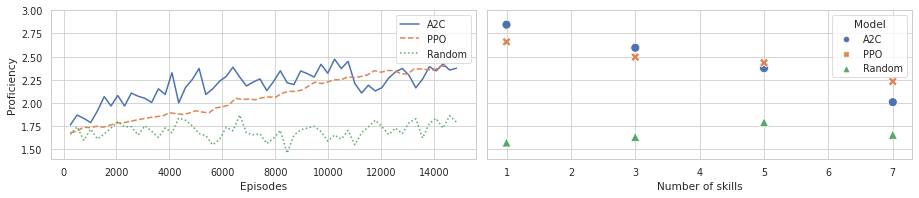

In [152]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

sns.set(style="whitegrid")
sns.set_context("paper",font_scale=1.1, rc={"lines.linewidth": 1.5})


fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True)
fig.set_size_inches(6.4 * 2, 4.8 * 0.6)

a2c_line = pd.read_csv("history/a2c_line.csv")
ppo_line = pd.read_csv("history/ppo_line.csv")
random_line = pd.read_csv("history/random_line.csv")
sns.lineplot(
    a2c_line["episodes"],
    a2c_line["benchmarking-fourth-time-again-(2) - avg_batch_mean_proficiency"],
    label="A2C",
    ax=ax[0],
)
smoothed = (
    ppo_line["benchmarking-fourth-time-again-(2) - avg_batch_mean_proficiency"]
    .rolling(25, min_periods=25)
    .mean()[24::25]
)  # non-overlapping smoothing to adjust logging rate from a2c
sns.lineplot(ppo_line["episodes"], smoothed, label="PPO", ax=ax[0], linestyle="--")
sns.lineplot(
    random_line["episodes"],
    random_line["benchmarking-fourth-time-again-(2) - avg_batch_mean_proficiency"],
    label="Random",
    ax=ax[0],
    dashes=(2, 2),
    linestyle=":",
)
ax[0].set_xlabel("Episodes")
ax[0].set_ylabel("Proficiency")

scatter_df = pd.read_csv("history/scatter.csv")
scatter_df.loc[scatter_df["model"] == "ppo", "model"] = "PPO"
scatter_df.loc[scatter_df["model"] == "random", "model"] = "Random"
scatter_df.loc[scatter_df["model"] == "a2c", "model"] = "A2C"
scatter_df.head()
scatter_df.columns = ["Name", "Number of skills", "Proficiency", "Model", "_wandb"]
sns.scatterplot(
    data=scatter_df,
    x="Number of skills",
    y="Proficiency",
    hue="Model",
    markers=["o", "X", "^"],
    style="Model",
    s=80,
    ax=ax[1],
    hue_order=["A2C", "PPO", "Random"],
)
plt.ylim((1.4, 3))
plt.tight_layout()
plt.savefig("plot.png")